# Stochastic SGD and Accelerate
---

Ho va ten: Vo Duy Nghia \
MSSV: 22280060 \
BTTH: Phuong phap so cho KHDL - SGD an AGD

## Data Set 1 - TWOplus1_data

In [35]:
# Import thu viên
import numpy as np
import random
np.random.seed(42)
random.seed(42)

In [36]:

def TwoXplus1_data(sample_size):
    import random
    import numpy as np
    x = np.random.rand(sample_size, 1)
    y = 2 * x + 1 + np.random.randn(sample_size, 1) * 0.1

    return x, y


In [69]:
# Viet cac ham de tinh toan vector gradient of one set va vector gradient of all set
# Ham stochastic_gradient_descent

def vector_gradient_of_1_set(a_i : float, b_i: float, x0, x1) -> np.array:
    """ vector gradient of one set """

    import numpy as np
    result_1_set =  np.array([
        -2 * (b_i - (x0 + a_i * x1)),
        -2 * a_i * (b_i - (x0 + x1 * a_i))
    ])
    return result_1_set

def vector_gradient_of_all_set(a : np.array, b: np.array, x0, x1):
    try:
        m = len(a)
        result = np.array([
            -2 * np.sum(b - (x0 + a * x1)),
            -2 * np.sum(a * (b - (x0 + x1 * a)))
        ])

        return result / m 
    except ValueError:
        raise ValueError("a and b must be 1D arrays of the same length")
   

def stochastic_gradient_descent(
        a: np.array
        ,b: np.array
        , eta : float 
        , inital_point : np.array
        , max_iter : int
        , epsilon: float = 1e-6
    ):

    # Buoc 1: Tinh vector gradient of one set and of all set da duoc dinh nghia o tren
    point = inital_point

    a = a.flatten().copy()
    b = b.flatten().copy()


    # Buoc 2: Dat i = 0, m = len(a)
    i = 0
    m = len(a)

    # Buoc 3: Lap lai cho den khi i < max_iter

    loss_list_by_iter = []

    while i < max_iter:
        # Buoc 3.1: Chon ngau nhien index thuoc tu 1 den m
        index = np.random.randint(0, m)

        # Buoc 3.2: Tinh next_point 
        vector_gradient = vector_gradient_of_1_set(a[index], b[index], point[0], point[1])
        next_point = point - eta * vector_gradient
        
        # Buoc 3.3: Kiem tra dieu kien dung neu gradient descent of all set nho hon epsilon
        full_grad = vector_gradient_of_all_set(a, b, next_point[0], next_point[1])

        Loss = np.linalg.norm(full_grad,2)


        item = [i,Loss]
        loss_list_by_iter.append(item)

        if Loss < epsilon:
            print("Thuat toan thanh cong sau ", i, "lan lap")
            return next_point, i, loss_list_by_iter
        # Buoc 3.4: Cap nhat point = next_point
        point = next_point
        # Buoc 3.5: Tang i len 1 don vi
        i += 1
    # Buoc 4: Xuat ra man hinh thong bao
    print("Thuat toan khong thanh cong sau ", max_iter, "lan lap")
    return point, i, loss_list_by_iter
        


In [70]:
def predict(x, point_min):
    """ predict """
    # point_min = np.array([0.5, 0.5])
    x0 = point_min[0]
    x1 = point_min[1]
    y = x0 + x1 * x
    return y

def error_predict_and_actualy(y_actual, y_predict):
    """ error predict and actualy """
    error = np.mean((y_actual - y_predict) ** 2)
    return error

Thuat toan thanh cong sau  1932 lan lap
Ket qua:  [0.99551056 1.94968593]
So buoc lap:  1932
x0, x1:  0.9955105621941962 1.9496859315877906
Thuc te:  [1.64779713 2.93285335 2.37318548 2.0560866  1.45860216 1.28941141
 1.12292004 2.58987747 2.14779175 2.42723741 0.92606963 2.97738951
 2.60482141 1.39550885 1.30347927 1.55203684 1.60713476 1.94374177
 1.94614453 1.46037392]
Du doan:  [1.72574616 2.84910487 2.42266885 2.16270659 1.29969791 1.29965088
 1.10875536 2.68428201 2.16749604 2.37602971 1.03564386 2.88653016
 2.61851227 1.40950514 1.35001214 1.35309175 1.58868738 2.01862079
 1.83766769 1.56331592]
Sai so:  0.007754310709927844


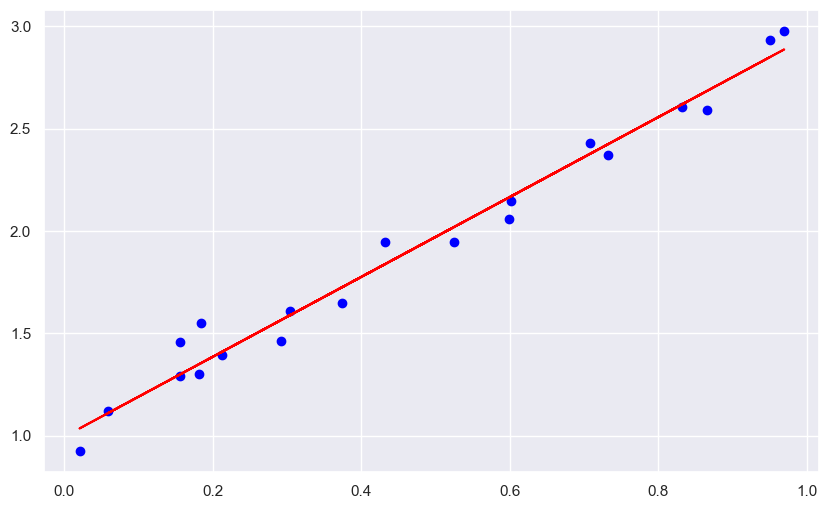

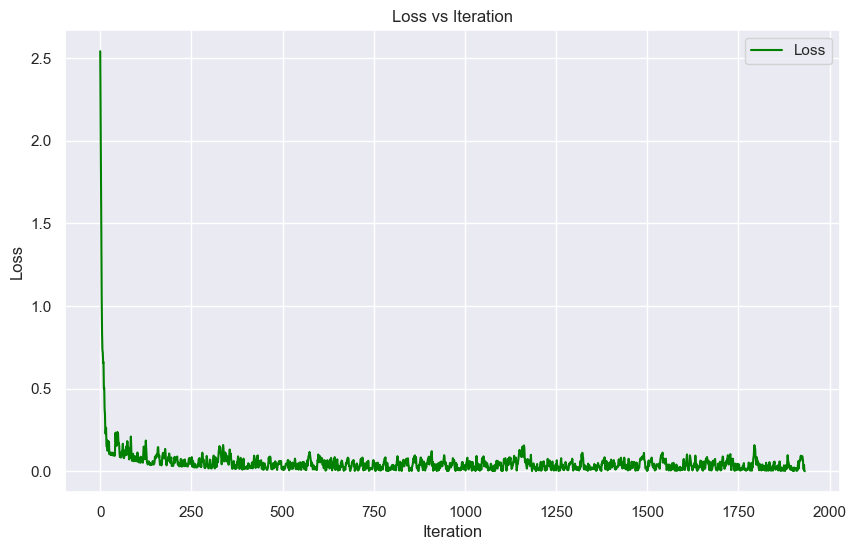

In [71]:
if __name__ == "__main__":
    import numpy as np
    import random
    # Khoi tao ngau nhien cho inital point
    np.random.seed(42)
    random.seed(42)

    a,b = TwoXplus1_data(20)

    a = a.flatten().copy()
    b = b.flatten().copy()

    inital_point = np.random.rand(2)

    point_min, i, loss_list = stochastic_gradient_descent(a,b,eta = 0.05, inital_point=inital_point, max_iter=10000, epsilon=1e-3)

    print("Ket qua: ", point_min)

    # ================= So buoc lap ================
    print("So buoc lap: ", i)

    # ================ Cap x0 va x1 cho ham du doan =====================
    x0 = point_min[0]
    x1 = point_min[1]
    print("x0, x1: ", x0, x1)

    # ================ Du doan =====================
    y_predict = predict(a, point_min)
    print("Thuc te: ", b)
    print("Du doan: ", y_predict)

    # ================ Sai so nghiem chinh xac va du doan ================
    y_actual = b
    err = error_predict_and_actualy(y_actual, y_predict)
    print("Sai so: ", err)

    # ================ Ve hinh cac gia tri dataset va duong thang du doan =====================
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set(style="darkgrid")
    plt.figure(figsize=(10, 6))

    plt.scatter(a, b, color='blue', label='Actual Data')
    plt.plot(a, y_predict, color='red', label='Predicted Line')

    # ================= Ve hinh Loss va so buoc lap su dung loss_list = np.array[[1,20], [2,10],.....] ================
    
    loss_list = np.array(loss_list)
    plt.figure(figsize=(10, 6))
    plt.plot(loss_list[:,0], loss_list[:,1], color='green', label='Loss')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Loss vs Iteration')
    plt.legend()
    plt.show()
    


---

## Dataset 2 - Tuoi va Huyet Ap

In [72]:
import random
random.seed(42)

# Data
tuoi = np.array([39, 36, 45, 47, 65, 46, 67, 42, 67, 56, 64, 56, 59, 34, 42, 48, 45, 17, 20, 19])

huyet_ap = np.array([144, 136, 138, 145, 162, 142, 170, 124, 158, 154, 162, 150, 140, 110, 128, 130, 135, 114, 116, 124])


In [73]:
# Hàm chuẩn hóa
def normalize(data):
    return (data - data.min()) / (data.max() - data.min())

In [74]:
def stochastic_gradient_descent(
        tuoi: np.array
        ,huyet_ap: np.array
        , eta : float 
        , inital_point : np.array
        , max_iter : int
        , epsilon: float = 1e-6
    ):

    # Buoc 1: Tinh vector gradient of one set and of all set da duoc dinh nghia o tren
    point = inital_point

    tuoi = tuoi.flatten().copy()
    huyet_ap = huyet_ap.flatten().copy()


    # Buoc 2: Dat i = 0, m = len(tuoi)
    i = 0
    m = len(tuoi)

    # Buoc 3: Lap lai cho den khi i < max_iter

    loss_list_by_iter = []

    while i < max_iter:
        # Buoc 3.1: Chon ngau nhien index thuoc tu 1 den m
        index = np.random.randint(0, m)

        # Buoc 3.2: Tinh next_point 
        vector_gradient = vector_gradient_of_1_set(tuoi[index], huyet_ap[index], point[0], point[1])
        next_point = point - eta * vector_gradient
        
        # Buoc 3.3: Kiem tra dieu kien dung neu gradient descent of all set nho hon epsilon
        full_grad = vector_gradient_of_all_set(tuoi, huyet_ap, next_point[0], next_point[1])

        Loss = np.linalg.norm(full_grad,2)


        item = [i,Loss]
        loss_list_by_iter.append(item)

        if Loss < epsilon:
            print("Thuat toan thanh cong sau ", i, "lan lap")
            return next_point, i, loss_list_by_iter
        # Buoc 3.4: Cap nhat point = next_point
        point = next_point
        # Buoc 3.5: Tang i len 1 don vi
        i += 1
    # Buoc 4: Xuat ra man hinh thong bao
    print("Thuat toan khong thanh cong sau ", max_iter, "lan lap")
    return point, i, loss_list_by_iter

Thuat toan thanh cong sau  8982 lan lap
Ket qua:  [0.02478863 0.80183526]
So buoc lap:  8982
x0, x1:  0.024788632330909728 0.8018352585527455
Thuc te:  [0.56666667 0.43333333 0.46666667 0.58333333 0.86666667 0.53333333
 1.         0.23333333 0.8        0.73333333 0.86666667 0.66666667
 0.5        0.         0.3        0.33333333 0.41666667 0.06666667
 0.1        0.23333333]
Du doan:  [0.37759615 0.32948603 0.47381638 0.50588979 0.79455048 0.48985308
 0.82662389 0.42570626 0.82662389 0.65022013 0.77851378 0.65022013
 0.69833025 0.29741262 0.42570626 0.52192649 0.47381638 0.02478863
 0.07289875 0.05686204]
Sai so thuc te va du doan:  0.01792257742871132


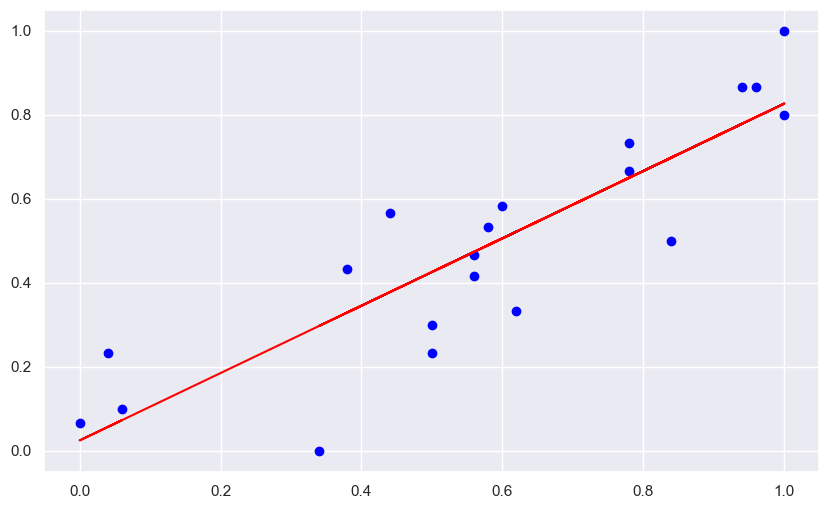

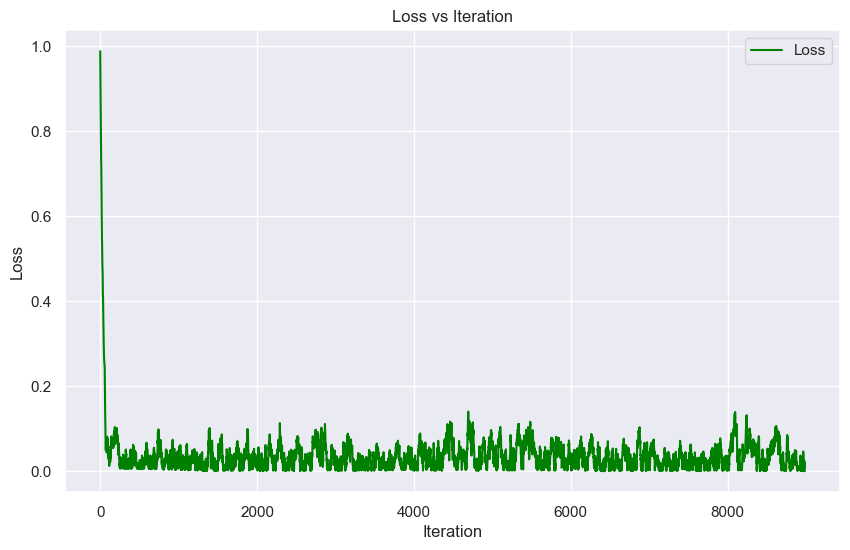

In [79]:
if __name__ == "__main__":
    import numpy as np
    import random
    # Khoi tao ngau nhien cho inital point
    np.random.seed(42)
    random.seed(42)

    # ======= Dinh nghia dau vao ==========
    # Chuẩn hóa dữ liệu
    tuoi = normalize(tuoi)
    huyet_ap = normalize(huyet_ap)
    eta = 0.01
    inital_point = np.random.rand(2)
    max_iter = 10000
    epsilon = 1e-4


    point_min, i, loss_list = stochastic_gradient_descent(tuoi = tuoi,huyet_ap = huyet_ap, eta = eta, inital_point=inital_point, max_iter=max_iter, epsilon=epsilon)
        
    print("Ket qua: ", point_min)

    # ================= So buoc lap ================
    print("So buoc lap: ", i)

    # ================ Cap x0 va x1 cho ham du doan =====================
    x0 = point_min[0]
    x1 = point_min[1]
    print("x0, x1: ", x0, x1)

    # ================ Du doan =====================
    y_predict = predict(tuoi, point_min)
    print("Thuc te: ", huyet_ap)
    print("Du doan: ", y_predict)

    # ================ Sai so nghiem chinh xac va du doan ================
    y_actual = huyet_ap
    err = error_predict_and_actualy(y_actual, y_predict)
    print("Sai so thuc te va du doan: ", err)

    # ================ Ve hinh cac gia tri dataset va duong thang du doan =====================
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set(style="darkgrid")
    plt.figure(figsize=(10, 6))

    plt.scatter(tuoi, huyet_ap, color='blue', label='Actual Data')
    plt.plot(tuoi, y_predict, color='red', label='Predicted Line')

    # ================= Ve hinh Loss va so buoc lap su dung loss_list = np.array[[1,20], [2,10],.....] ================
    
    loss_list = np.array(loss_list)
    plt.figure(figsize=(10, 6))
    plt.plot(loss_list[:,0], loss_list[:,1], color='green', label='Loss')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Loss vs Iteration')
    plt.legend()
    plt.show()

    


---

## Dataset 3  SALARY AND EXP

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import kagglehub
import os

def stochastic_gradient_descent_with_history(points, learning_rate=0.01, start_point=(0.0, 0.0), max_steps=10000, tolerance=1e-3):
    def gradient_for_one_sample(position, sample):
        intercept, slope = position
        input_val, output_val = sample
        prediction = intercept + slope * input_val
        residual = output_val - prediction
        grad_intercept = -2 * residual
        grad_slope = -2 * input_val * residual
        return grad_intercept, grad_slope

    def gradient_for_all_samples(position):
        intercept, slope = position
        sum_grad_intercept, sum_grad_slope = 0.0, 0.0
        for input_val, output_val in points:
            prediction = intercept + slope * input_val
            residual = output_val - prediction
            sum_grad_intercept += -2 * residual
            sum_grad_slope += -2 * input_val * residual
        count = len(points)
        return sum_grad_intercept / count, sum_grad_slope / count

    def calculate_mse(position):
        intercept, slope = position
        squared_errors = [(output_val - (intercept + slope * input_val)) ** 2 for input_val, output_val in points]
        return np.mean(squared_errors)

    step = 0
    current_position = start_point
    error_history = []

    while step <= max_steps:
        selected_sample = random.choice(points)
        delta_intercept, delta_slope = gradient_for_one_sample(current_position, selected_sample)
        new_intercept = current_position[0] - learning_rate * delta_intercept
        new_slope = current_position[1] - learning_rate * delta_slope
        updated_position = (new_intercept, new_slope)

        error = calculate_mse(updated_position)
        error_history.append(error)

        avg_grad_intercept, avg_grad_slope = gradient_for_all_samples(updated_position)
        gradient_magnitude = (avg_grad_intercept, avg_grad_slope)

        if np.linalg.norm(gradient_magnitude) < tolerance:
            print(f"Algorithm converged at iteration {step+1}")
            return updated_position, error_history

        current_position = updated_position
        step += 1

    print(f"Algorithm did not converge after {max_steps} iterations.")
    return current_position, error_history

# Load data
dataset_path = kagglehub.dataset_download("rohankayan/years-of-experience-and-salary-dataset")
print("Dataset path:", dataset_path)

csv_path = os.path.join(dataset_path, "Salary_Data.csv")

data_frame = pd.read_csv(csv_path)
print(data_frame.head())
features = data_frame['YearsExperience'].values
targets = data_frame['Salary'].values



100%|██████████| 378/378 [00:00<00:00, 49.4kB/s]

Extracting files...
Dataset path: C:\Users\nghia\.cache\kagglehub\datasets\rohankayan\years-of-experience-and-salary-dataset\versions\1
   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


Algorithm converged at iteration 3583
(slope, intercept): (9403.34, 26064.06)


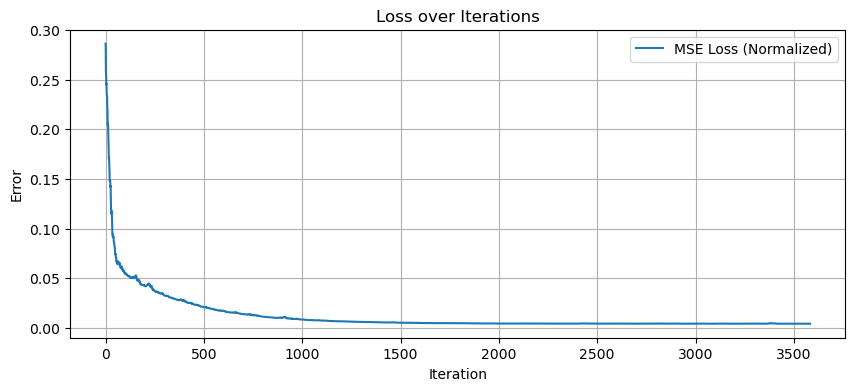

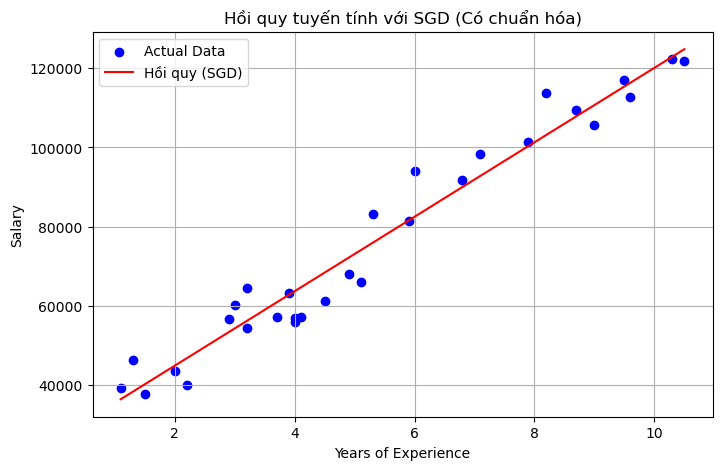

In [125]:
# Normalize data
features_min, features_max = features.min(), features.max()
targets_min, targets_max = targets.min(), targets.max()
features_normalized = (features - features_min) / (features_max - features_min)
targets_normalized = (targets - targets_min) / (targets_max - targets_min)
# Prepare data for SGD
training_pairs = list(zip(features_normalized, targets_normalized))

# Run SGD
optimal_params, error_track = stochastic_gradient_descent_with_history(
    training_pairs,
    learning_rate=0.01,  # Increased learning rate for normalized data
    start_point=(0.0, 0.0),
    max_steps=10000,
    tolerance=1e-3
)

intercept_norm, slope_norm = optimal_params

# Denormalize parameters for original scale
slope_opt = slope_norm * (targets_max - targets_min) / (features_max - features_min)
intercept_opt = intercept_norm * (targets_max - targets_min) + targets_min - slope_opt * features_min

print(f"(slope, intercept): ({slope_opt:.2f}, {intercept_opt:.2f})")

# Plot loss
plt.figure(figsize=(10, 4))
plt.plot(error_track, label='MSE Loss (Normalized)')
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.title("Loss over Iterations")
plt.grid(True)
plt.legend()
plt.savefig('loss_plot.png')

# Plot regression line
plt.figure(figsize=(8, 5))
plt.scatter(features, targets, color='blue', label="Actual Data")

x_range = features
y_pred = slope_opt * x_range + intercept_opt
plt.plot(x_range, y_pred, color='red', label="Hồi quy (SGD)")

plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Hồi quy tuyến tính với SGD (Có chuẩn hóa)")
plt.legend()
plt.grid(True)
plt.savefig('regression_plot.png')